## Load useful packages

In [1]:
# load useful packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
%matplotlib inline

## CMIP6 online catalogue

In [2]:
# open cmip6 online catalogue
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [3]:
cat = col.search(source_id=['CNRM-ESM2-1'], 
                 experiment_id=['historical'], table_id=['Ofx'], 
                 variable_id=['areacello']) 
                 #member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
1,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
2,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
3,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
4,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
5,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r10i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
6,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r9i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
7,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r8i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
8,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r6i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
9,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r11i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200408


In [5]:
# Create dictionary from the list of datasets we found
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [9]:
areacello = dset_dict[list(dset_dict.keys())[0]]

In [10]:
# choose one member_id
areacello = areacello.isel(member_id = 0).squeeze()


## Select only the Greenland Sea area

In [11]:
GLarea = areacello.areacello.where((areacello.lat>=70) & (areacello.lat<=85) & (areacello.lon <= 10) & (areacello.lon >= -10), drop = True)

## Import NO3 concentration data

In [12]:
cat2 = col.search(source_id=['CNRM-ESM2-1'], 
                 experiment_id=['historical'], table_id=['Omon'], 
                 variable_id=['no3']) 
                 
cat2.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
1,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
2,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
3,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
4,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
5,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r10i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
6,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r9i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
7,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r8i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
8,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r7i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
9,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r6i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117


In [13]:
# Create dictionary from the list of datasets we found
dsi_dict = cat2.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [14]:
no3 = dsi_dict[list(dsi_dict.keys())[0]]

## Average over ensemble means

In [15]:
no3 = no3.isel(lev = 0)

In [16]:
# average over the ensemble means
no3_mean = no3.mean(dim = ['member_id'], keep_attrs=True)

In [17]:
no3_GL = no3_mean.where((no3_mean.lon>=-10) & (no3_mean.lon<=10) & (no3_mean.lat <=85 )  & (no3_mean.lat >= 70),drop = True)

In [18]:
no3_weighted = (GLarea*no3_GL).sum(dim=('x','y'))/GLarea.sum(dim=('x','y'))

In [20]:
from dask.diagnostics import ProgressBar

with ProgressBar():
    no3_monthly = no3_weighted['no3'].groupby('time.month').mean(dim = ["time"],keep_attrs=True).compute()

[########################################] | 100% Completed | 10m 54s


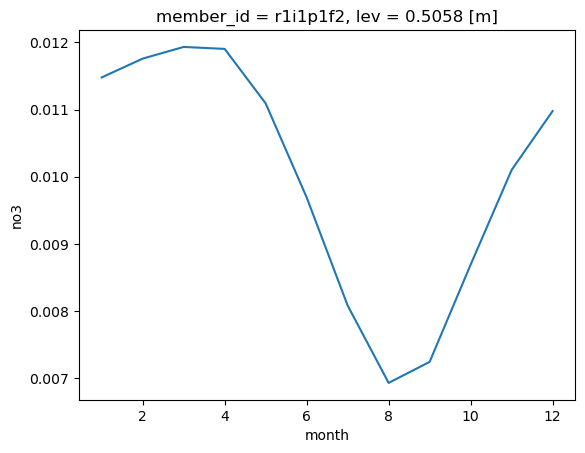

In [21]:
no3_monthly.plot()

In [25]:
with ProgressBar():
    no3_yearly = no3_weighted['no3'].groupby('time.year').mean(dim = ["time"],keep_attrs=True).compute()

[########################################] | 100% Completed | 10m 47s


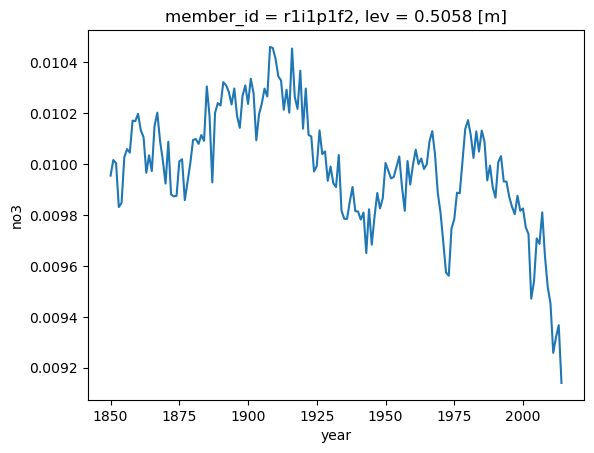

In [26]:
no3_yearly.plot()